Student ID: 13196490

I will be analysing the **Healthy Lifestyle Cities Report 2021** data set in order to identify possible relevant factors related to Obesity levels.  

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Data source: Healthy Lifestyle Cities Report 2021<br>
Available at: https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021<br>
Original study/report: https://www.lenstore.co.uk/research/healthy-lifestyle-report/<br>

In [73]:
ob_df= pd.read_csv("healthy_lifestyle_city_2021.csv") 
ob_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [74]:
# check number of rows and columns
print(f'rows/observations: {ob_df.shape[0]}')
print(f'columns/features: {ob_df.shape[1]}')

rows/observations: 44
columns/features: 12


In [75]:
# check features, data type and missing values
ob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


### The data set has 12 features :

**City**: name of the city, of type object*<br>

**Rank**: the city's rank regarding healthy lifestyle (1: healthiest lifestyle city, to 44: the least healthy city).<br>

**Sunshine hours(City)**: avergage hours of sunshine per year in the city; numerical value stored as type object.<br>

**Cost of a bottle of water(City)**: the cost of a bottle of water in the city, unclear if this is a mean or a median value(£/bottle); numerical value stored as type object.<br>

**Obesity levels(Country)**: % of obese people in the country; numerical value stored as type object.<br>

**Life expectancy(years) (Country)**: country's average life expectancy (years), of type float.<br>

**Pollution(Index score) (City)**: city's average annual pollution index - aggregate of air and water pollution (0: no pollution to 100: maximal pollution); numerical value stored as type object.<br>

**Annual avg. hours worked**: country's average annual recorded worked hours; numerical value stored as type object.<br>

**Happiness levels(Country)**: country's happiness (1: minimal happiness, to 10: maximal happiness), of type float.<br>

**Outdoor activities(City)**: the number of outdoor activities available in a city (according to TripAdvisor listings), of type int.<br>

**Number of take out places(City)**: the number of places offering take out food services available in a city (according to TripAdvisor listings), of type int.<br>

**Cost of a monthly gym membership(City)**: the average cost of monthly gym memebrship in city (£); numerical value stored as type object.<br>


The data set has 44 total entries and no NULL values.
<br>


*in Pandas object type is used to store text or mixed numeric and non-numeric values (https://pbpython.com/pandas_dtypes.html).

In [76]:
# checking missing data further
# as the data set only contains 44 entries, all rows can be easily visualised 
ob_df

# alternatively we could explore random rows in the data frame: 
# ob_df.sample(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [77]:
# missing data is not NULL, instead it is repesented by a dash '-'
# select all rows that have '-' values 
missing_values = ob_df[(ob_df == '-').any(axis=1)]
missing_values

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
11,Beijing,12,2671,£0.26,6.20%,75.4,85.43,-,5.12,223,261,£38.62
12,Bangkok,13,2624,£0.22,10.00%,74.1,76.64,-,5.99,377,1796,£50.03
13,Buenos Aires,14,2525,£0.57,28.30%,75.9,52.64,-,5.97,246,1435,£22.45
16,Jakarta,17,2983,£0.21,6.90%,68.5,84.39,-,5.28,114,833,£29.94
19,Geneva,20,-,£2.62,19.50%,82.6,27.25,1557,7.56,44,444,£70.00
22,Cairo,23,3542,£0.16,32.00%,70.7,91.74,-,4.15,323,250,£23.25
23,Taipei,24,1405,£0.57,6.20%,75.4,49.32,-,5.12,134,717,£34.76
25,Mumbai,26,2584,£0.15,3.90%,67.3,82.84,-,3.57,187,1183,£19.54
30,Hong Kong,31,1836,£0.75,6.20%,75.4,67.46,-,5.51,277,1257,£57.95


In [78]:
len(missing_values)

13

### There are 13 incomplete rows and 3 factors that have missing data:
* **Sunshine hours(City)**: missing 1 value (for Geneva)<br>
according to https://weather-and-climate.com/average-monthly-hours-Sunshine,geneva,Switzerland
the average annual amount of sun in Geneva is 1850 hours. We can replace this value manually in the data frame.*
<br>

* **Pollution(Index score) (City)**:  missing 1 value (for Fukuoka) <br>
according to https://www.numbeo.com/pollution/in/Fukuoka
the pollution index in Fukuoka is 41.24. We can replace this value manually in the data frame.
<br>

* **Annual avg. hours worked**: missing 11 values<br>	
2021 data from the International Labour Organisation is available at https://test-ilostat.pantheonsite.io/data/country-profiles/ for all countries except China and Taiwan. The International Labour Organisation stores records on China and Hong Kong until 2016. I will use these numbers to estimate the values for 2021. Taiwan 2019 data is quoted in https://www.cna.com.tw/news/firstnews/202110160023.aspxas to be 2,021. I will be using this value as an estimate for the missing data (the source of this data is in Mandarin, however, the article gives values for Mexico, South Korea, and Japan that are very similar to the ones in the current data set).
<br>

*The missing values can be overwritten manually directly in the CSV file - the data set is small enough for this to be faster than a programmatic approach. However, I have opted to write Python code for this task in order for the data set loaded initially to remain the same as the one available on Kaggle.

In [79]:
# replace missing values for Sunshine hours(City)
ob_df['Sunshine hours(City)'] = ob_df['Sunshine hours(City)'].replace('-', '1850')

In [80]:
# replace missing values for Pollution(Index score) (City)
ob_df['Pollution(Index score) (City)'] = ob_df['Pollution(Index score) (City)'].replace('-', '41.24')

In [81]:
# set the missing values for Annual avg. hours worked in a city:hours dictinary
brazil = 52 * 37.7
argentina = 52 * 34.5
thai = 52 * 40.5
indonesia = 52 * 36.5
egypt = 52 * 42.9
india = 52 * 47.7 
south_africa = 52 * 41.4
china = 52 * 46.1
china_hk = 52 * 43
taiwan = 2021

missing_work_hours = {'Beijing':china, 
                      'Bangkok':thai, 
                      'Buenos Aires':argentina,
                      'Jakarta': indonesia, 
                      'Cairo':egypt, 
                      'Taipei':taiwan, 
                      'Mumbai':india, 
                      'Hong Kong':china_hk, 
                      'Shanghai':china, 
                      'Sao Paulo':brazil, 
                      'Johannesburg':south_africa
                     }

for k in missing_work_hours:
    missing_work_hours[k] = str(math.floor(missing_work_hours[k]))
    
# missing_work_hours

In [82]:
# replace the misssing values for Annual avg. hours worked in the data frame
for k in missing_work_hours:
    ob_df.loc[ob_df['City'] == k, 'Annual avg. hours worked'] = missing_work_hours[k]
    
# ob_df

In [83]:
# remove % and £ characters
ob_df['Cost of a bottle of water(City)'] = ob_df['Cost of a bottle of water(City)'].str.strip('£')
ob_df['Obesity levels(Country)'] = ob_df['Obesity levels(Country)'].str.strip('%')
ob_df['Cost of a monthly gym membership(City)'] = ob_df['Cost of a monthly gym membership(City)'].str.strip('£')

# ob_df

In [84]:
# change object type with numeric for all columns except City
for col in ob_df:
    try:
        # change digit only values
        ob_df[col] = pd.to_numeric(ob_df[col])
    except ValueError:
        # leave char. strings unchanged
        pass
    
ob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     int64  
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     float64
 7   Annual avg. hours worked                44 non-null     int64  
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [85]:
# now that all data is cleaned 
# check descriptive statistics
ob_df.describe()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.000000,44.000000,44.000000,44.00000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,2236.863636,1.173409,21.92500,78.17500,50.897727,1792.659091,6.435000,213.977273,1443.113636,40.420000
std,12.845233,563.933799,0.718642,10.19567,5.30437,21.651870,281.812650,0.991202,127.190297,1388.803270,15.006457
min,1.000000,1405.000000,0.150000,3.90000,56.30000,13.080000,1380.000000,3.570000,23.000000,250.000000,16.070000
25%,11.750000,1809.750000,0.570000,19.50000,75.40000,36.067500,1576.500000,5.870000,125.250000,548.000000,31.310000
50%,22.500000,2066.000000,1.195000,22.30000,80.40000,50.980000,1775.500000,6.900000,189.500000,998.000000,37.330000
75%,33.250000,2626.500000,1.600000,29.00000,81.80000,66.350000,1961.250000,7.175000,288.250000,1674.250000,47.210000
max,44.000000,3542.000000,3.200000,36.20000,83.20000,91.740000,2480.000000,7.800000,585.000000,6417.000000,73.110000


#### Analyse numerical factors

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Sunshine hours(City)'}>,
        <Axes: title={'center': 'Cost of a bottle of water(City)'}>],
       [<Axes: title={'center': 'Obesity levels(Country)'}>,
        <Axes: title={'center': 'Life expectancy(years) (Country)'}>,
        <Axes: title={'center': 'Pollution(Index score) (City)'}>],
       [<Axes: title={'center': 'Annual avg. hours worked'}>,
        <Axes: title={'center': 'Happiness levels(Country)'}>,
        <Axes: title={'center': 'Outdoor activities(City)'}>],
       [<Axes: title={'center': 'Number of take out places(City)'}>,
        <Axes: title={'center': 'Cost of a monthly gym membership(City)'}>,
        <Axes: >]], dtype=object)

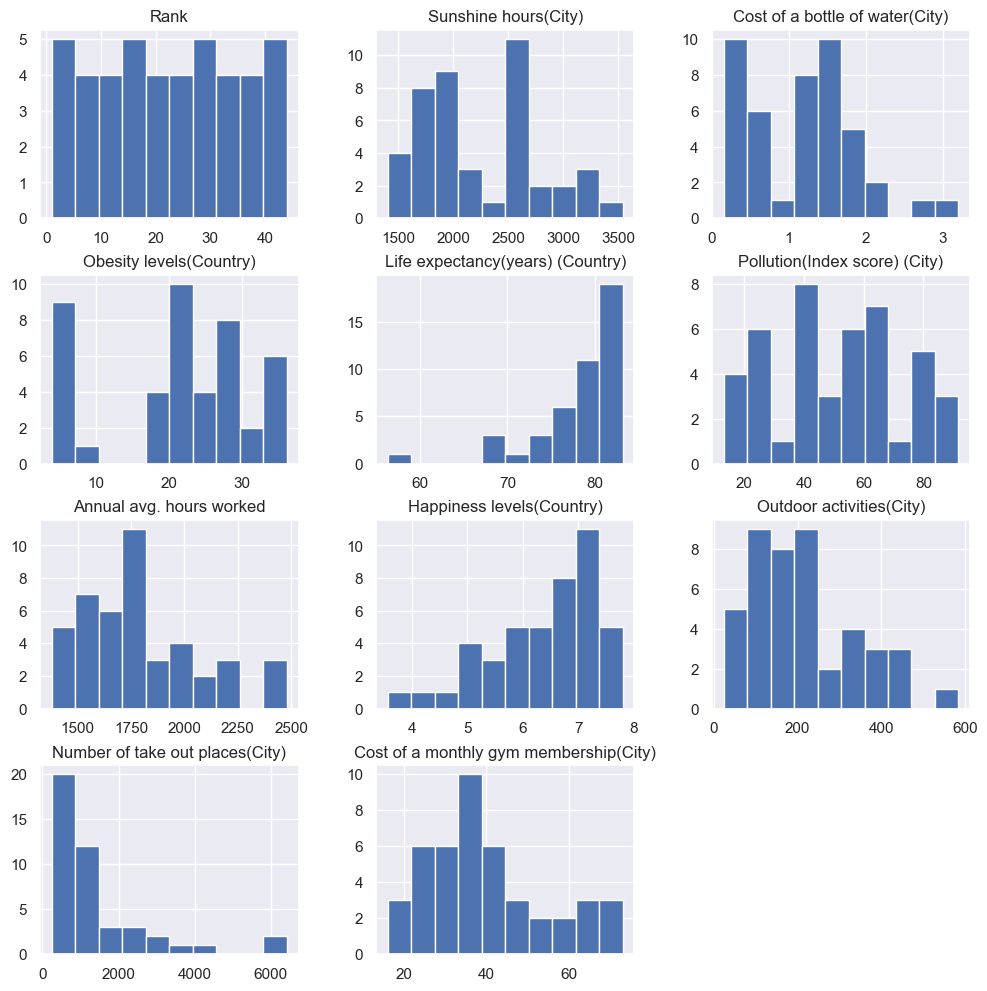

In [86]:
# visualise distributions
sns.set(rc={"figure.figsize":(3, 3)})
ob_df.hist(figsize=(12,12))

The descriptive statistics, as well as the histograms, indicate a fairly normal distribution for most factors, except *Life Expectancy* and *Number of take out Places*. This is can be explained by the fact that the majority of the cities in the data set are from developed economies where life expectation is high (Meshram, 2020). 

*Number of take out Places* looks left skewed, but if we take a closer look at the descriptive statistics (mean=1443 median=998, range=(250, 6417)) we can notice that the range is large and the mean and median are similar. This indicates the presence of outliers (for example the cities of London and Tokyo, both have over 5000 take-out places, number that is higly larger compared to the other cities in the data set). To deal with the lognormal distribution of this variable I will try to transform the data using the Box-Cox transformation as it has been found to perform better than the tranditional dirstirbution transformations like log, square root or inverse (Osborne, 2019).

Because the literature shows both *life expectancy* and *fast food/restaurants* might be relevant in predicting obesity (Vidra, Trias-Llimós and Janssen, 2019; Holsten, 2008), I will keep *Life Expectancy* and *Number of take out Places* in the analisys, even thought their distribution might affect the ability to capture relations in the present data set (for example there is little variation in the life expectancy data so I expect this will not be able to capture any variance in obesity rates). 

Text(0.5, 1.0, 'Number of take out places(City) box-cox transformation')

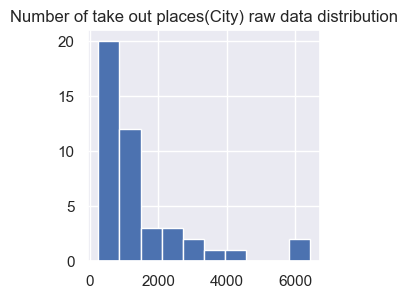

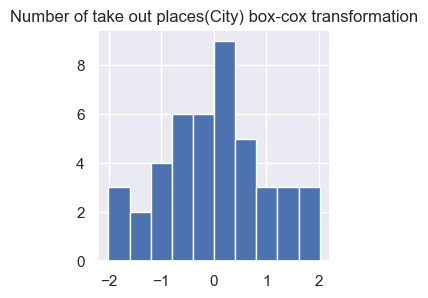

In [87]:
# perform Box-Cox transformation on Number of take out Places
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox')
trans_data = power.fit_transform(ob_df[['Number of take out places(City)']])
trans_data = pd.DataFrame(trans_data)

# visualize Number of take out places(City) data
ob_df['Number of take out places(City)'].hist()
plt.title('Number of take out places(City) raw data distribution')

trans_data.hist()
plt.title('Number of take out places(City) box-cox transformation')

In [88]:
# add transformed data in the original dataset as a separate column
n = ob_df.columns.get_loc("Number of take out places(City)")
ob_df.insert(n+1, 'Tranformed(boxcox) - take out places', trans_data)
# ob_df

<Axes: >

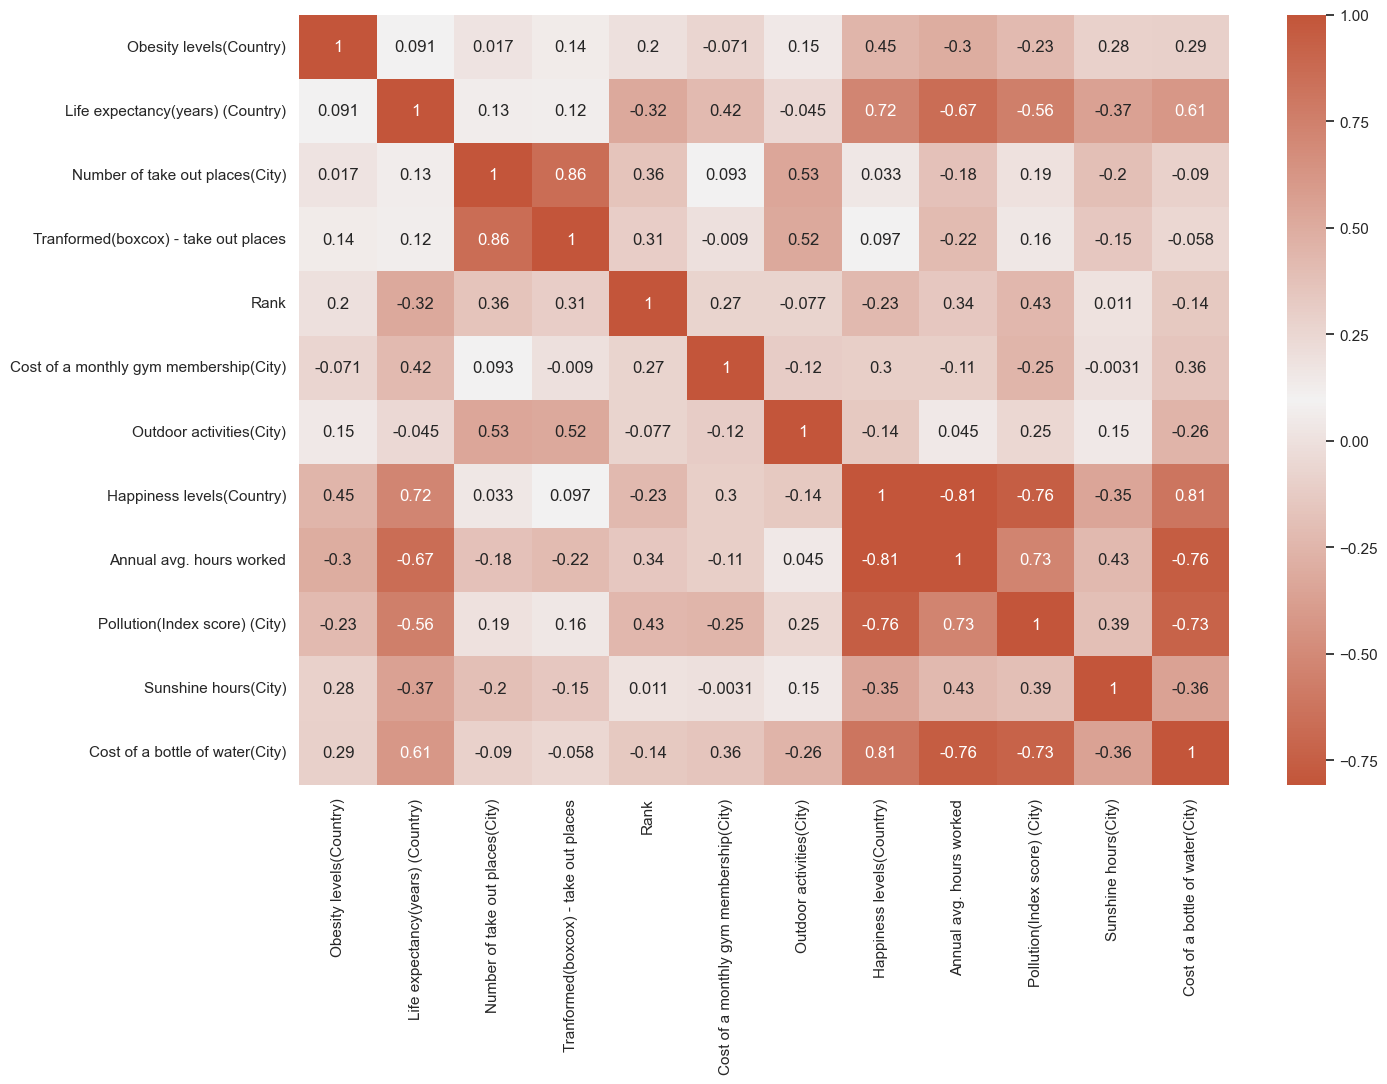

In [89]:
# heatmap - see corellation for all features except Life Expectancy and Number of take out Places
df = ob_df[['Obesity levels(Country)', 'Life expectancy(years) (Country)', 'Number of take out places(City)', 'Tranformed(boxcox) - take out places', 'Rank', 'Cost of a monthly gym membership(City)','Outdoor activities(City)', 'Happiness levels(Country)', 'Annual avg. hours worked', 'Pollution(Index score) (City)', 'Sunshine hours(City)','Cost of a bottle of water(City)']]

plt.figure(figsize=(15,10))
my_cmap = sns.diverging_palette(20, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=my_cmap)

From the heat map above we can notice that *obesity* is not very related to any of the other factors. There is an average positive correlation between *obesity* and *happiness* and we can also observe small correlations between *obesity* and *worked hours*, *pollution*, *sunshine* and the *cost of a bottle of water*. These relations are very weak, and we can observe high colinearity between these factors. For example, happiness is highly correlated with *life expectancy*, *worked hours*, *pollution* and *cost of a bottle of water* - happier countries have less pollution, people live longer and work fewer hours on average and a bottle of water is more expensive. Also, the present data shows that, in cities with higher levels of pollution people work more hours, and the cost of a bottle of water is cheaper. These relations are consistent with those reported in the literature (Lu, 2020; Clark, 2018; Bannai and Tamakoshi, 2013; Rosnick, 2013).

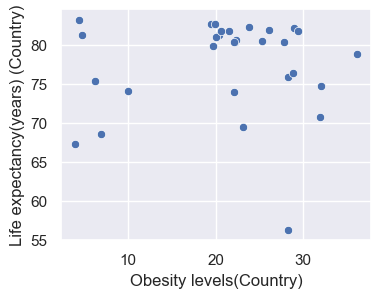

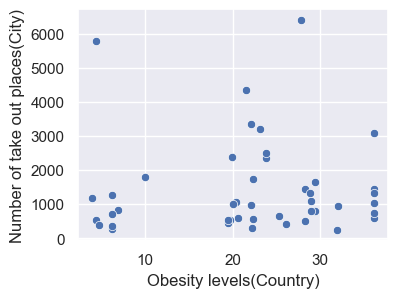

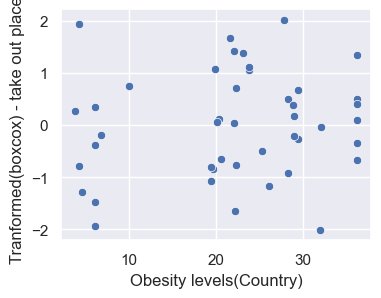

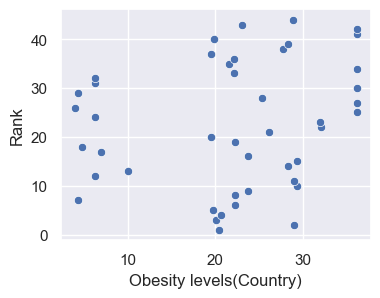

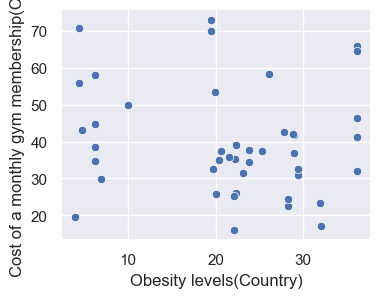

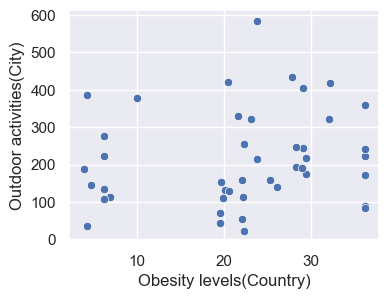

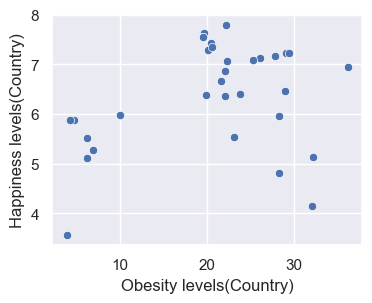

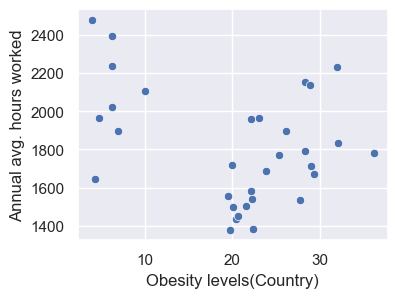

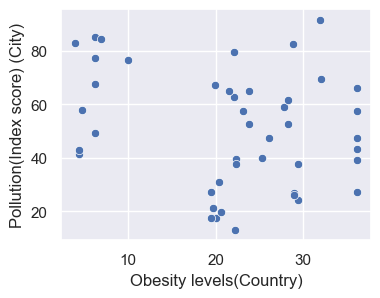

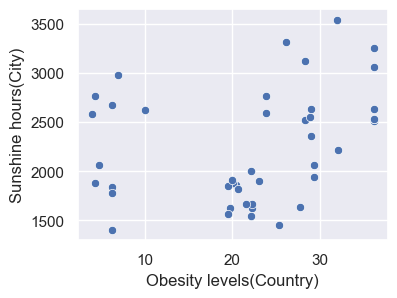

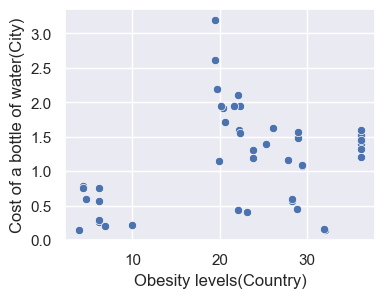

In [90]:
# scatter plots for obesity vs. all other factors
num_pred = list(df.columns)
num_pred.remove('Obesity levels(Country)')
# num_pred

for i in range(len(num_pred)):
    f = num_pred[i]
    plt.figure(figsize=(4, 3)) 
    sns.scatterplot(x='Obesity levels(Country)',y=num_pred[i],data=df)

As seen above both in the heat map and the scatter plots, the relations between *obesity* and the other factors are very weak. However, we can observe possible (small) relationships between the target variable and the following factors: 
* *Happiness levels(Country)* - there is an average positive correlation, but the relation does not appear to be linear; for low levels of obesity there is a positive relation, but after obesity levels rise above 20% the relation becomes negative.
<br>
* *Annual avg. hours worked* - small negative correlation
<br>
* *Sunshine hours (City)* - small positive correlation; the scatter plot shows a stronger relation once obesity rises above 20%.
<br>
* *Pollution (Index Score) (City)* - small negative correlation; the scatter plot does not indicate a relation.
<br>
* *Cost of a bottle of water (City)* - small positive correlation; the scatter plot indicates a nonlinear relation: it seems that as obesity levels increase the price of water increases, but once obesity is above 20% the relation reverses. 
<br>

Multicolinearity is observed between these factors (see discussion above). Nevertheless, these associations barely approach the threshold where they become a serious concern. As a general guideline, when the simple correlation coefficient between two predictors exceeds 0.8 or 0.9, it indicates a significant multicolinearity problem (Midi, Sarkar and Rana, 2010).


If *happiness* is not included in the final analysis, the colinearity of the other factors is reduced. However, this factor seems to be the best predictor for obesity in the current data set. 


The following factors will be considered as predictors of *obesity* for the present data set:
* *Sunshine hours (City)* 
* *Happiness levels(Country)*
* *Cost of a bottle of water (City)*
* *Annual avg. hours worked*
<br>

The *Obesity levels* variable is measured at the country level, and so is *Annual avg. hours worked* and *Happiness levels*, whilst *sunshine hours* and *cost of a bottle of water* are both measured at the city level. However, I will consider national *Obesity levels*, *Annual avg. hours worked* and *Happiness levels* as acceptable estimates for the city levels. 


#### Analyse categorical factors (City)

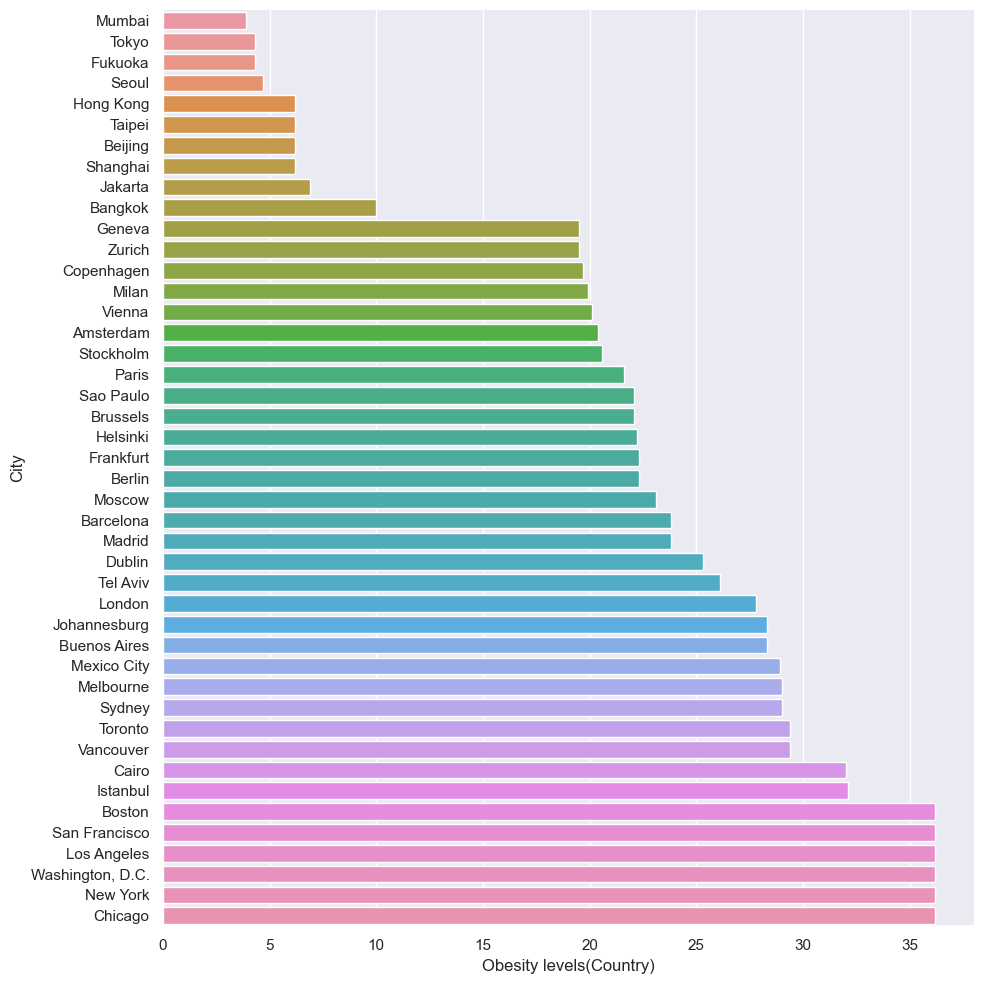

In [91]:
# obesity rates by city
city_ob = ob_df[['City', 'Obesity levels(Country)']]
city_ob = city_ob.sort_values(by=['Obesity levels(Country)'])
# city_ob

# plot cities obesity rates, in order
sns.catplot(data=city_ob, 
            x="Obesity levels(Country)", 
            y="City",
            height=10,
            kind='bar')
plt.show()

In the plot above we can observe that the location of the city seems to be a good predictor for *obesity levels* (for example all the cities in Asia have very low obesity levels compared to the cities in both North and South America). However the variable 'City' has a single entry and thus can't be analysed as it is. However, we can include the geographical location of each city as 2 additional columns in the data frame: longitude and latitude. 

In [92]:
#pip install geopy

In [93]:
# get coordinates of Cities - latitude and longitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
lat = []
lon = []
for c in ob_df['City']:
    location = geolocator.geocode(c)
    lat.append(float(location.raw['lat']))
    lon.append(float(location.raw['lon']))

In [94]:
# add city's latitude and longitude columns in the data frame
ob_df['lat'] = lat
ob_df['lon'] = lon
ob_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Tranformed(boxcox) - take out places,Cost of a monthly gym membership(City),lat,lon
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434,7.44,422,1048,0.110394,34.90,52.373080,4.892453
1,Sydney,2,2636,1.48,29.0,82.1,26.86,1712,7.22,406,1103,0.174756,41.66,-33.869844,151.208285
2,Vienna,3,1884,1.94,20.1,81.0,17.33,1501,7.29,132,1008,0.060962,25.74,48.208354,16.372504
3,Stockholm,4,1821,1.72,20.6,81.8,19.63,1452,7.35,129,598,-0.642819,37.31,59.325117,18.071093
4,Copenhagen,5,1630,2.19,19.7,79.8,21.24,1380,7.64,154,523,-0.836226,32.53,55.686724,12.570072


array([[<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>]],
      dtype=object)

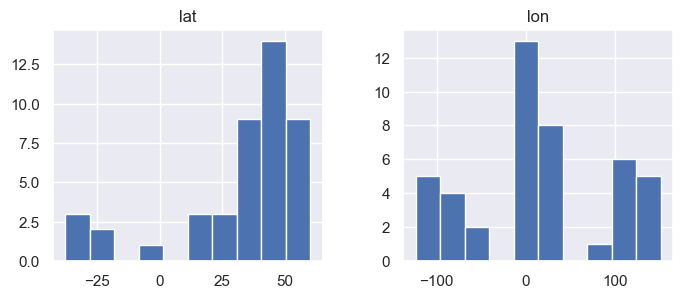

In [95]:
# visualise distributions for the new columns
ob_df[['lat', 'lon']].hist(figsize=(8,3))

The distribution of latitude is right skewed, indicating that most cities in the dataset come from the northern hemisphere (this is to be expected as the northern hemisphere is more populated). 
Longitude's distribution shows that most cities in the dataset come from western and central Europe, while the Americas and East Asia are equally represented. 

<Axes: >

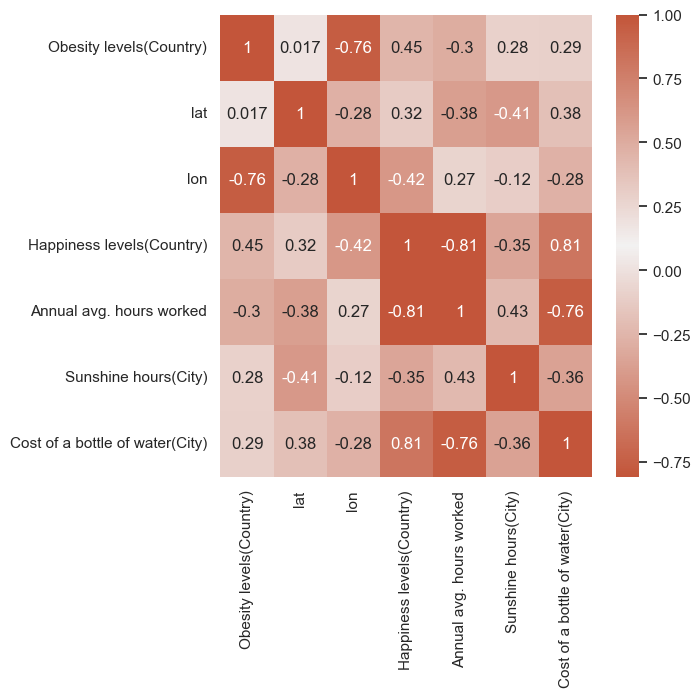

In [96]:
# heatmap - see corellation for all features included previously in the analysis and the newly added longitude and latitude
df = ob_df[['Obesity levels(Country)', 'lat', 'lon', 'Happiness levels(Country)', 'Annual avg. hours worked', 'Sunshine hours(City)','Cost of a bottle of water(City)']]

plt.figure(figsize=(6,6))

sns.heatmap(df.corr(), annot=True, cmap=my_cmap)


<Axes: xlabel='Obesity levels(Country)', ylabel='lon'>

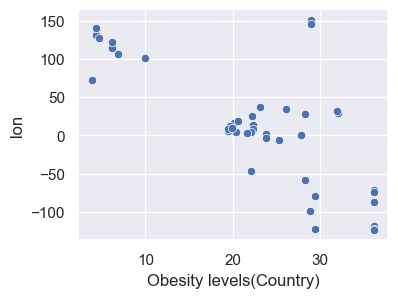

In [97]:
# longitute shows a high correlation with obesity levels
# plot obesity and longitude 
plt.figure(figsize=(4, 3)) 
sns.scatterplot(x='Obesity levels(Country)',y='lon',data=df)

It can be seen in both the heatmap and the plot above that longitude seems to be a good predictor for obesity rates as the two factors seem to have a negative linear relation - lower rates of obesity are related to higher values for longitude (further east from the prime meridian - Asia and East Asia). 

The following factors are currently considered as predictors of obesity for the present data set:

* Sunshine hours (City)
* Happiness levels(Country)
* Cost of a bottle of water (City)
* Annual avg. hours worked
* Longitude (lon)

However, as the task requires selecting only 3 predictors, I will choose the 3 most correlated factors with obesity, as per the heatmap. As *Happiness levels(Country)* is highly correlated with *Cost of a bottle of water (City)* and *Annual avg. hours worked* I will drop these 2 - even though the correlation isn't at the threshold where it could become a serious concern and they could be included (see discussion above), these factors have similar correlation values with *obesity* as *sunshine*, but the latter is not as highly correlated with *happiness* and thus we can consider its effect to be more independent. 

Included factors in the final analysis:
* Longitude (lon)
* Happiness levels(Country)
* Sunshine hours (City)

In [98]:
# create a list for the 3 predictors included in the analysis
ob_predictors = list(set(['lon', 'Happiness levels(Country)', 'Sunshine hours(City)']))
ob_predictors

['Sunshine hours(City)', 'lon', 'Happiness levels(Country)']

In [99]:
# pip install hvplot

In [100]:
# check the relationship between selected predictors and the target variable
import hvplot.pandas
ob_df.hvplot(x='Obesity levels(Country)', y=ob_predictors, kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Obesity levels(Country)]   (value)

The plot shows there might be a relation between *obesity* and the amount of *sunshine* the city gets per year. 

The relation between *obesity* and *longitude* is not obvious on this plot, because the difference in scale on which the variables are measured. Same observation can be made with regards to the relation between *obesity* and *happiness*. Thus we need to scale the data. 


In [101]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = ob_df[['lon', 'Happiness levels(Country)', 'Sunshine hours(City)', 'Obesity levels(Country)']]
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['lon', 'Happiness levels(Country)', 'Sunshine hours(City)', 'Obesity levels(Country)'])
# df_scaled

In [102]:
# plot the scaled variables to better visualise the spread of the data points
df_scaled.hvplot(x='Obesity levels(Country)', y=ob_predictors, kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Obesity levels(Country)]   (value)

*Longitude* seems to have a linear relation with *obesity*.
*Sunshine* and *happiness* seem to have a non-linear relation with *obesity*, indicating that a quadratic model would be a better fit.

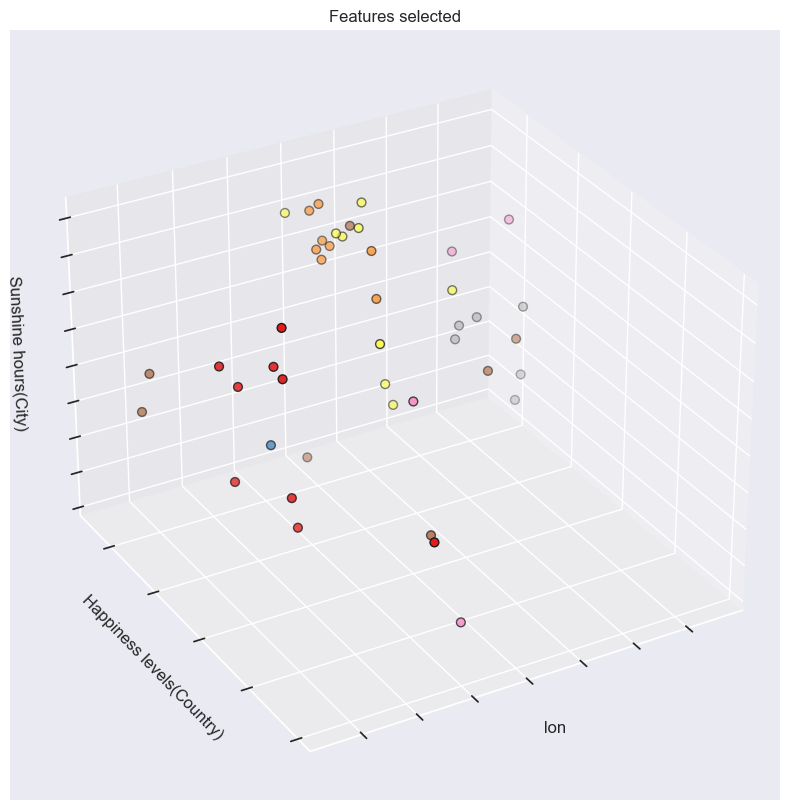

In [103]:
# plot the factors in 3D
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=120)

ax.scatter(
    df_scaled[['lon']],
    df_scaled[['Happiness levels(Country)']],
    df_scaled[['Sunshine hours(City)']],
    c=df_scaled[['Obesity levels(Country)']],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("Features selected")
ax.set_xlabel("lon")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Happiness levels(Country)")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Sunshine hours(City)")
ax.zaxis.set_ticklabels([])

plt.show()

From the 3D plot above it appears the 3 factors together could be used to predict obesity levels - we can see 2 main clusters emerging from the plot above. 

#### Evaluate selected predictors performance

Because all factors, but *longitude*, do not have normal distributions, and also because the relations appear non-linear, I have chosen to fit a non-parametric regression model - Random Forest Regression. 

To test the better fit of the non-parametric model for the present dataset, I will also fit a linear regression model (parametric model) and compare predictive performance with the non-parametric model. 

For evaluating the models I will report R squared values (how much the variance of the dependent variable is determined by the variance of the independent variables) as literature shows that this metric is more informative and truthful, and is easier to interpret (Chicco, Warrens and Jurman, 2021).

In [104]:
# separate the predictors and the predicted variable
X = df_scaled.drop('Obesity levels(Country)', axis=1)
y = df_scaled['Obesity levels(Country)']

In [105]:
# split data into train and test
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(30, 3) (14, 3) (30,) (14,)


#### Linear regression

In [106]:
# fit regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

print(f'R squared train data: {reg.score(train_X, train_y)}')
print(f'R squared test data: {reg.score(test_X, test_y)}')

R squared train data: 0.6079158823169671
R squared test data: 0.7981915523776576


#### Random Forest Regression

In [107]:
# fit Random Forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=2)
rf_reg.fit(train_X, train_y)

print(f'R squared train data: {rf_reg.score(train_X, train_y)}')
print(f'R squared test data: {rf_reg.score(test_X, test_y)}')

R squared train data: 0.8775234724659672
R squared test data: 0.8979685915928315


Text(0.5, 0, 'Number of trees')

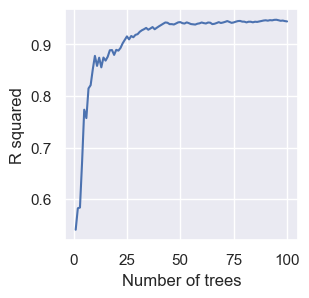

In [108]:
# get the optimal number of trees for the Random Forest model
# in this case we can observe that the performance of the model stabilises after around 10 trees 
r_sq = []
ntree = []
for i in range(1,101):
    rf_reg = RandomForestRegressor(n_estimators=i, random_state=2)
    rf_reg.fit(train_X, train_y)
    r_sq.append(float(rf_reg.score(train_X, train_y)))
    ntree.append(i)

plt.plot(ntree, r_sq)
plt.ylabel('R squared')
plt.xlabel('Number of trees')

ROC AUC score - this in general is not possible for regression. 
However, a method on how to compute this metric for regression models is available at https://towardsdatascience.com/how-to-calculate-roc-auc-score-for-regression-models-c0be4fdf76bb.

The authors of the article above also present a more computationally efficient method to estimate this metric, but due to my dataset being small, I have chosen to use the precise function which uses all the data points in the set. 

In [109]:
# ROC AUC score - function
# code source: https://towardsdatascience.com/how-to-calculate-roc-auc-score-for-regression-models-c0be4fdf76bb
def naive_roc_auc_score(y_true, y_pred):
    
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

In [110]:
# ROC score
# ROC curve can't be ploted as the values are continuous (there are no classes to compute a confusion matrix )
from sklearn import metrics

y_pred_train = rf_reg.predict(train_X)
y_pred = rf_reg.predict(test_X)
true_y = np.array(test_y)
print ("ROC AUC Score:", naive_roc_auc_score(true_y, y_pred))

ROC AUC Score: 0.9080459770114943


The regression ROC AUC score above can be interpreted in the following manner: the probability that our model estimates a higher value for a compared to b, given that a > b. This means that our model predicts similar ranks for y values with a probability of 90% (if a value *a* in the *y_test* set is larger than a value *b* in the *y_test* set, then there is a 90% probability that this relation will be maintained when predicting these values using our model). Or, better said, if the true rate of *obesity* in city *a* is larger than the true rate of *obesity* in city *b*, then our model will predict higher rates of *obesity* for city *a* than city *b*, with a probability of 90%. 

The Random Forest model used above gives very high accuracy on training data, indicative of overfitting. Considering the quality of the current data set, I would judge that the regression model is preferred as it performs worst on training data, but the accuracy is higher and acceptable for the test set (considering the data) - is less likely to be overfitted. 

The size (44) of the current data set is very small and splitting the data into train-test-validation sets would mean the model would train on very little data this has been shown to seriously reduce predictive performance (Martens and Dardenne, 1998), thus I do not consider this to be a good solution for this situation. Martens and Dardenne (1998) found that, for small data sets, the best solution to evaluate performance is cross-validation. I will apply this method for the 2 models above.

#### Cross-validation for Linear Regression and Random Forest models

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# define cross-validation method to use
cv = KFold(n_splits=5, random_state=2, shuffle=True)

# build multiple linear regression model
lr_model = LinearRegression()

# use k-fold CV to evaluate model
lr_scores = cross_val_score(lr_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# mean absolute error for linear regression
lr_RMSE = np.sqrt(np.mean(np.absolute(lr_scores)))

# build Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=2)

# use k-fold CV to evaluate model
rf_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# mean absolute error for random forest
rf_RMSE = np.sqrt(np.mean(np.absolute(rf_scores)))

print(f'Linear regression RMSE: {lr_RMSE}')
print(f'Random Forest regression RMSE: {rf_RMSE}')

Linear regression RMSE: 0.6847269659732933
Random Forest regression RMSE: 0.5354981350459068


The RMSE is lower for the Random Forest model, which means this model would be preferred for predicting *obesity* using the factors selected here.

#### PCA 

In [112]:
# the data is scaled and ready for PCA analysis
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

# perform PCA
pca = PCA()
pca_data = pca.fit_transform(df_scaled)
pca_data.shape

(44, 4)

Performing PCA on the reduced dataset (3 predictors + 1 target variable = 4 dimensions) did not reduce its dimensionality further. This means all factors are relevant for the analysis and each explains a significant portion of the variance.

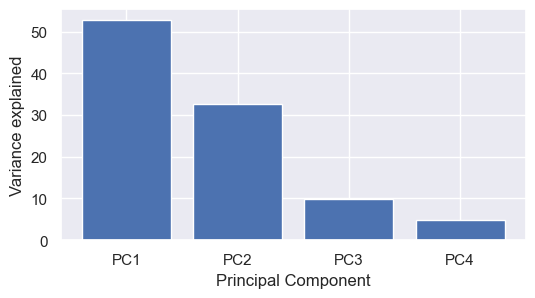

PC1 explains 52.76% of the variance in the data
PC2 explains 32.57% of the variance in the data
PC3 explains 9.89% of the variance in the data
PC4 explains 4.78% of the variance in the data


In [113]:
# explained variance per PC factor
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(6,3))
plt.bar(x=labels, height=per_var)
plt.ylabel('Variance explained')
plt.xlabel('Principal Component')
plt.show()

for i in range(4):
    print(f'PC{i+1} explains {per_var[i]}% of the variance in the data')
    

In [114]:
# the dimensionality of the data set can be reduced if we accept an infromation loss of 5%
# perform PCA - find factors that explain up to 95% of variance in the data
pca = PCA(0.95)
pca_data = pca.fit_transform(df_scaled)
pca_data.shape

(44, 3)

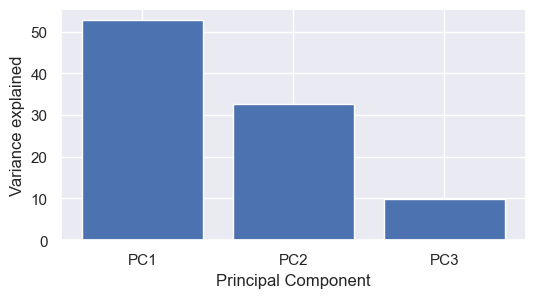

PC1 explains 52.76% of the variance in the data
PC2 explains 32.57% of the variance in the data
PC3 explains 9.89% of the variance in the data


In [115]:
# explained variance per PC factor
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(6,3))
plt.bar(x=labels, height=per_var)
plt.ylabel('Variance explained')
plt.xlabel('Principal Component')
plt.show()

for i in range(3):
    print(f'PC{i+1} explains {per_var[i]}% of the variance in the data')

In [116]:
pca_df = pd.DataFrame(pca_data, index=range(0,44), columns=labels)
# pca_df
pca_df.insert(loc=0, column='Obesity levels(Country)', value=df_scaled[['Obesity levels(Country)']].values)
# pca_df

In [117]:
pca_df.hvplot(x='Obesity levels(Country)', y=labels, kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Obesity levels(Country)]   (value)

PC1 has a linear negative relation with *obesity* - the higher the PC1 values the lowe the *obesity* rates.
<br>

PC2 seems to have a nonlinear relation with *obesity* - this relation seems to follow a *U* curve, characteristic of a polynomial function of grade 2.
<br>

As expected the relation between PC3 and *obesity* is very difficult to be observed on the graph as this factor explains very little variation in *obesity* rates (9.89%).

In [118]:
# use PCAs as factors in the model

# separate the predictors and the predicted variable
Xpca = pca_df.drop('Obesity levels(Country)', axis=1)
ypca = pca_df['Obesity levels(Country)']

# split data into train and test sets
train_Xpca, test_Xpca, train_ypca, test_ypca = train_test_split(Xpca, ypca, test_size=0.3, random_state=2)
print(train_Xpca.shape, test_Xpca.shape, train_ypca.shape, test_ypca.shape)

(30, 3) (14, 3) (30,) (14,)


In [119]:
# fit linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_Xpca, train_ypca)

print(f'R squared train data: {reg.score(train_Xpca, train_ypca)}')
print(f'R squared test data: {reg.score(test_Xpca, test_ypca)}')

R squared train data: 0.8703044184329103
R squared test data: 0.9255727529256934


The regression model performed better when using PCs as predictors. However, the high R-squared values indicate overfitting.  

In [120]:
# fit Random Forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=2)
rf_reg.fit(train_Xpca, train_ypca)

print(f'R squared train data: {rf_reg.score(train_Xpca, train_ypca)}')
print(f'R squared test data: {rf_reg.score(test_Xpca, test_ypca)}')

R squared train data: 0.9744712876542541
R squared test data: 0.9503960398293237


In [121]:
# Cross-validation

# build linear regression model
lr_pca_model = LinearRegression()

# use k-fold CV to evaluate model
lr_pca_scores = cross_val_score(lr_pca_model, Xpca, ypca, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# mean absolute error for linear regression
lr_pca_RMSE = np.sqrt(np.mean(np.absolute(lr_pca_scores)))

# build Random Forest model
rf_pca_model = RandomForestRegressor(n_estimators=5, random_state=2)

# use k-fold CV to evaluate model
rf_pca_scores = cross_val_score(rf_pca_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# mean absolute error for random forest
rf_pca_RMSE = np.sqrt(np.mean(np.absolute(rf_scores)))

print(f'Linear regression RMSE: {lr_pca_RMSE}')
print(f'Random Forest regression RMSE: {rf_pca_RMSE}')

Linear regression RMSE: 0.5242317901843139
Random Forest regression RMSE: 0.5354981350459068


From the cross-validation, we can see that the 2 models perform similarly when using the PCs values. 

PCA improved both the prediction of the linear regression model and the random forest model. The R-squared values for both models are very high, and this is very likely due to overfitting (the quality of the data is low: few observations, not very strong relations between the target value and the predictors).

Performing PCA did not reduce the dimensionality of the data. 

Because of these reasons, it is not advisable to perform PCA for the current data set, especially as using the original factors in the model, makes it easier to interpret than the PCA. 

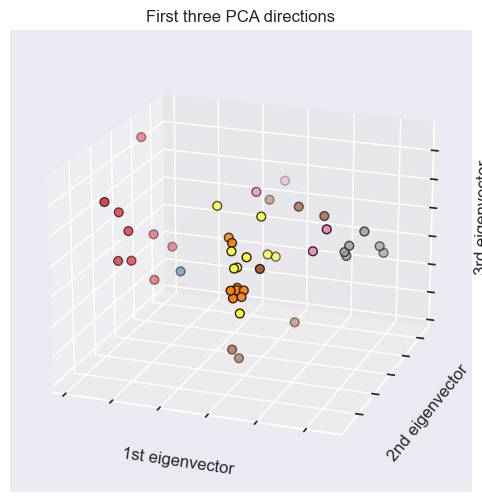

In [122]:
# plot the 3 PCs 
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-160, azim=70)

ax.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    pca_data[:, 2],
    c=df_scaled[['Obesity levels(Country)']],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

The plot shows a separation between the red and yellow data points. 
The PCA shows that 2 factors explain most of the variance, but not enough for a very clear separation. 

Are there alternatives that could be explored? Yes. We could look at the number of fast food restaurants operating in a city/region, as the increase in fast food consumption has been linked to the increase in obesity rates (An, He and Shen, 2019). For example, the USA has twice as many Mcdonald's restaurants as Europe and Asia (Christian and Gereffi, 2010). Also, income appears to be a factor associated with obesity. In a systematic review of 87 studies from 14 different countries, Jia et al. (2019) found that the availability of fast food was more consistently associated with a higher risk of obesity in low-income populations. We could also extend the data set to include population age and analyse *obesity rates* for different age groups. 

#### References
<br>

An, R., He, L. and Shen, M.J. (2019). Impact of neighbourhood food environment on diet and obesity in China: a systematic review. Public Health Nutrition, 23(3), pp.1–17. 
doi:https://doi.org/10.1017/s1368980019002167.
<br>

Bannai, A. and Tamakoshi, A. (2013). The association between long working hours and health: A systematic review of epidemiological evidence. Scandinavian Journal of Work, Environment & Health, 40(1), pp.5–18. doi:https://doi.org/10.5271/sjweh.3388.
<br>

Chicco, D., Warrens, M.J. and Jurman, G. (2021). The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation. PeerJ Computer Science, [online] 7(5), p.e623. doi:https://doi.org/10.7717/peerj-cs.623.
<br>

Christian, M. and Gereffi, G. (2010). The Marketing and Distribution of Fast Food. Pediatric Obesity, pp.439–450. doi:https://doi.org/10.1007/978-1-60327-874-4_30.
<br>

Clark, A.E. (2018). Four Decades of the Economics of Happiness: Where Next? Review of Income and Wealth, 64(2), pp.245–269. doi:https://doi.org/10.1111/roiw.12369.
<br>

Holsten, J.E. (2008). Obesity and the community food environment: a systematic review. *Public Health Nutrition*, 12(3), p.1. doi:https://doi.org/10.1017/s1368980008002267.
<br>

Jia, P., Luo, M., Li, Y., Zheng, J., Xiao, Q. and Luo, J. (2019). Fast‐food restaurant, unhealthy eating, and childhood obesity: A systematic review and meta‐analysis. Obesity Reviews, 22(S1). doi:https://doi.org/10.1111/obr.12944.
<br>

Lu, J.G. (2020). Air pollution: A systematic review of its psychological, economic, and social effects. Current Opinion in Psychology, 32(1), pp.52–65. doi:https://doi.org/10.1016/j.copsyc.2019.06.024.
<br>

Martens, H.A. and Dardenne, P. (1998). Validation and verification of regression in small data sets. Chemometrics and Intelligent Laboratory Systems, 44(1-2), pp.99–121. doi:https://doi.org/10.1016/s0169-7439(98)00167-1.
<br>

Meshram, S.S. (2020). Comparative Analysis of Life Expectancy between Developed and Developing Countries using Machine Learning. *2020 IEEE Bombay Section Signature Conference (IBSSC)*. doi:https://doi.org/10.1109/ibssc51096.2020.9332159.
<br>

Midi, H., Sarkar, S.K. and Rana, S. (2010). Collinearity diagnostics of binary logistic regression model. *Journal of Interdisciplinary Mathematics*, 13(3), pp.253–267. doi:https://doi.org/10.1080/09720502.2010.10700699.
<br>

Osborne, J. (2019). Improving your data transformations:  Applying the Box-Cox transformation. *Practical Assessment, Research, and Evaluation*, [online] 15(1). doi:https://doi.org/10.7275/qbpc-gk17.
<br>

Rosnick, D. (2013). Reduced Work Hours as a Means of Slowing Climate Change. [online] Center for Economic and Policy Research. Available at: https://static1.squarespace.com/static/60b956cbe7bf6f2efd86b04e/t/60ca75fb26f65a35af00fd05/1623881214645/climate-change-workshare-2013-02.pdf [Accessed 21 Jun. 2023].
<br>

Vidra, N., Trias-Llimós, S. and Janssen, F. (2019). Impact of obesity on life expectancy among different European countries: secondary analysis of population-level data over the 1975–2012 period. *BMJ Open*, [online] 9(7). doi:https://doi.org/10.1136/bmjopen-2018-028086.
<br>